In [1]:
import requests
from Config import ConsumerKey as key

In [2]:
key

'NXVTMDSSC9WNYXT5YXWIUZ2CEUG2DZSP'

In [3]:
# define our endpoint
endpoint = r'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format('QQQ')

In [4]:
# definte our payload
payload = {'apikey':key,
          'periodType':'month',
          'period':'1',
          'frequencyType':'daily',
          'frequency':'1',
          'startDate':'1651285293',
          'needExtendedHoursData':'true'}

In [5]:
# make a request
content = requests.get(url = endpoint, params = payload)

In [6]:
# convert it to a dictionary
data = content.json()

In [7]:
import pandas as pd

In [8]:
df2 = pd.json_normalize(data['candles']) 

In [9]:
import matplotlib.pyplot as plt

In [10]:
x = df2['datetime']
y = df2['close']

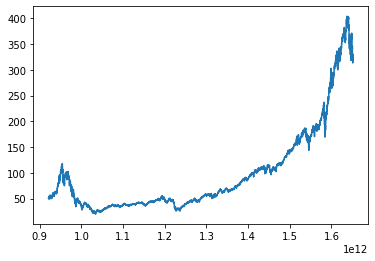

In [11]:
plt.plot(x,y)

In [12]:
import datetime

In [13]:
df = df2.copy()

In [14]:
df['datetime'] = df['datetime'].floordiv(1000)

In [15]:
def datetimeconvert(x):
    return datetime.datetime.fromtimestamp(x)

In [16]:
df['datetime'] = df['datetime'].apply(datetimeconvert)

In [17]:
x = df['datetime']
y = df['close']

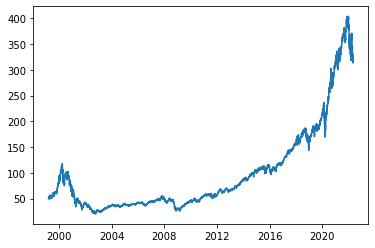

In [18]:
plt.plot(x,y)

In [19]:
# endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format('QQQ')
# endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/{}/chains'.format('QQQ')
endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/chains'

In [20]:
payload2 = {'apikey':key,
           'symbol':'QQQ',
           'strikeCount':'30',
           'fromDate':'2022-04-01'}

In [21]:
content2 = requests.get(url = endpoint2, params = payload2)

In [22]:
data2 = content2.json()

In [23]:
optionsChain = pd.json_normalize(data2) 

In [24]:
# optionsChain

In [25]:
# for i in optionsChain.columns:
#     print(i)

In [26]:
# optionsChain['callExpDateMap.2022-05-02:0.304.0']

In [27]:
# counter=0
# for i in range(12,1812):
#     counter+=1
#     print(i)
# print(counter)

In [28]:
# len(optionsChain.transpose())-12

In [29]:
categories = ['putCall','symbol', 'volatility','delta','gamma',
              'theta','vega','rho','openInterest','strikePrice']

In [30]:
# optionsChain.iat[0,12][0].get('putCall')

In [31]:
# for i in range(len(optionsChain.transpose())-12):
#     print(optionsChain.iat[0, i+12][0])

In [32]:
selected = pd.DataFrame(columns = categories, dtype = object)

In [33]:
# selected

In [34]:
for i in range(len(optionsChain.transpose())-12):
    for j in categories:
        # iterate and put values into 'selected' dataframe
        selected.at[i, j] = optionsChain.iat[0, i+12][0].get(j)

In [35]:
selected

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,openInterest,strikePrice
0,PUT,QQQ_050422P315,0,-0.789,0,-91.036,0.001,-0.006,8981,315
1,PUT,QQQ_050422P316,0,-0.789,0,-91.036,0.001,-0.006,5123,316
2,PUT,QQQ_050422P317,0,-0.789,0,-91.036,0.002,-0.006,5560,317
3,PUT,QQQ_050422P318,0,-0.789,0,-91.036,0.002,-0.006,3207,318
4,PUT,QQQ_050422P319,0,-0.789,0,-91.036,0.002,-0.006,2359,319
...,...,...,...,...,...,...,...,...,...,...
1735,CALL,QQQ_011924C380,23.225,0.431,0.004,-0.04,1.738,1.98,1221,380
1736,CALL,QQQ_011924C385,23.041,0.412,0.004,-0.039,1.72,1.904,1567,385
1737,CALL,QQQ_011924C390,22.865,0.394,0.004,-0.038,1.697,1.827,698,390
1738,CALL,QQQ_011924C395,22.699,0.375,0.004,-0.037,1.671,1.75,855,395


In [36]:
'''cycle through all dates; add them to set; create new dfs with set; place relevant items into relevant dfs'''

'cycle through all dates; add them to set; create new dfs with set; place relevant items into relevant dfs'

In [37]:
# a = selected['symbol'][0]
# a[4:10]

In [38]:
# month = a[4:6]
# day = a[6:8]
# year = a[8:10]
# print(month, day, year)

In [39]:
import collections

In [54]:
# %%time
# # create set for use with dataFrame creation loop (name of dfs = date portion of 'symbol')
# dateSet = set()

# for i in selected['symbol']:
# #     print(selected['symbol'][4:10])
# #     print(i[4:10])
#     a = i[4:10]
#     dateSet.add(a)
# print(dateSet)

{'051622', '091622', '050922', '071522', '051122', '061722', '052522', '060322', '052722', '121622', '031723', '093022', '012023', '011924', '060122', '033123', '121523', '052022', '050422', '081922', '053122', '051322', '061623', '052322', '061022', '063022', '123022', '050622', '051822'}
Wall time: 1e+03 µs


In [59]:
# %%time
# # create set for use with dataFrame creation loop (name of dfs = date portion of 'symbol')
# dateSet = set()

# for i in selected['symbol']:
# #     print(selected['symbol'][4:10])
# #     print(i[4:10])
#     a = i[4:10]
#     dateSet.add(a)
# dateSet = list(dateSet)
# print(dateSet)

['051622', '091622', '050922', '071522', '051122', '061722', '052522', '060322', '052722', '121622', '031723', '093022', '012023', '011924', '060122', '033123', '121523', '052022', '050422', '081922', '053122', '051322', '061623', '052322', '061022', '063022', '123022', '050622', '051822']
Wall time: 999 µs


In [69]:
%%time
# create set for use with dataFrame creation loop (name of dfs = date portion of 'symbol')
dateSet = []
for i in selected['symbol']:
#     print(selected['symbol'][4:10])
#     print(i[4:10])
    if i[4:10] not in dateSet:
        a = i[4:10]
        dateSet.append(a)
print(dateSet)

['050422', '050622', '050922', '051122', '051322', '051622', '051822', '052022', '052322', '052522', '052722', '053122', '060122', '060322', '061022', '061722', '063022', '071522', '081922', '091622', '093022', '121622', '123022', '012023', '031723', '033123', '061623', '121523', '011924']
Wall time: 990 µs


In [70]:
# creating dataframes via loop with names = items from dateSet above
d = {}
for name in dateSet:
    d[name] = pd.DataFrame(columns = categories, dtype = object)

In [71]:
d

{'050422': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '050622': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '050922': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '051122': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '051322': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '051622': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '051822': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '052022': Empty DataFrame
 Column

In [72]:
%%time
# loop through all dateSet dates, then loop through all rows in selected(dataframe),
#  check if date from dateSet is within symbol from current row of selected(dataframe),
#  if date from dateSet is within symbol from current row of selected(dataframe) then add the 
#  current row of selected(dataframe) into the dateSet dates' dataframe (dataframes are housed
#  within the 'd' dictionary which is a dictionary of dataframes created for each date)
for dates in dateSet:
#     print(i)
    counter = 0
    for symbol in selected['symbol']:
        
        if dates in symbol:
#             print(j)
#             print(d[i])
            d[dates].loc[len(d[dates].index)] = selected.loc[counter]
        counter += 1

Wall time: 8.16 s


In [73]:
d

{'050422':    putCall          symbol  volatility  delta  gamma   theta   vega    rho  \
 0      PUT  QQQ_050422P315         0.0 -0.789    0.0 -91.036  0.001 -0.006   
 1      PUT  QQQ_050422P316         0.0 -0.789    0.0 -91.036  0.001 -0.006   
 2      PUT  QQQ_050422P317         0.0 -0.789    0.0 -91.036  0.002 -0.006   
 3      PUT  QQQ_050422P318         0.0 -0.789    0.0 -91.036  0.002 -0.006   
 4      PUT  QQQ_050422P319         0.0 -0.789    0.0 -91.036  0.002 -0.006   
 5      PUT  QQQ_050422P320         0.0 -0.789    0.0 -91.036  0.002 -0.006   
 6      PUT  QQQ_050422P321         0.0 -0.789    0.0 -91.036  0.002 -0.006   
 7      PUT  QQQ_050422P322         0.0 -0.789    0.0 -91.036  0.002 -0.006   
 8      PUT  QQQ_050422P323         0.0 -0.789    0.0 -91.036  0.003 -0.006   
 9      PUT  QQQ_050422P324         0.0 -0.789    0.0 -91.036  0.003 -0.006   
 10     PUT  QQQ_050422P325         0.0 -0.789    0.0 -91.036  0.007 -0.006   
 11     PUT  QQQ_050422P326         0.0 -0

In [74]:
d.get('051822')

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,openInterest,strikePrice
0,PUT,QQQ_051822P310,34.047,-0.174,0.011,-0.194,0.169,-0.024,553,310.0
1,PUT,QQQ_051822P311,33.860,-0.185,0.012,-0.201,0.176,-0.025,299,311.0
2,PUT,QQQ_051822P312,33.641,-0.196,0.012,-0.207,0.183,-0.027,243,312.0
3,PUT,QQQ_051822P313,33.445,-0.208,0.013,-0.213,0.190,-0.028,401,313.0
4,PUT,QQQ_051822P314,33.240,-0.221,0.014,-0.219,0.196,-0.030,511,314.0
5,PUT,QQQ_051822P315,33.049,-0.234,0.014,-0.225,0.203,-0.032,480,315.0
6,PUT,QQQ_051822P316,32.869,-0.248,0.015,-0.231,0.209,-0.034,373,316.0
7,PUT,QQQ_051822P317,32.673,-0.262,0.015,-0.236,0.215,-0.036,428,317.0
8,PUT,QQQ_051822P318,32.460,-0.277,0.016,-0.241,0.221,-0.038,296,318.0
9,PUT,QQQ_051822P320,32.041,-0.308,0.017,-0.250,0.233,-0.042,1154,320.0


In [45]:
# testDF.loc[len(testDF.index)] = selected.loc[counter]

In [46]:
# testDF = pd.DataFrame(columns = categories, dtype = object)

In [47]:
# # Iterate through selected DF and put all rows of specific date into one new dataframe
# counter = 0
# for i in selected['symbol']:
#     if '050222' in i:
#             testDF.loc[len(testDF.index)] = selected.loc[counter]
#     counter+=1

In [48]:
# testDF

In [49]:
# testDF['isCall'] = 1

In [50]:
# #categorize puts and calls with 1 hot for 1 = CALL
# counter = 0
# for i in testDF['putCall']:
#     if i == 'PUT':
#         testDF.at[counter,'isCall'] = 0
#     counter+=1

In [51]:
# testDF

In [52]:
# testDF.loc[testDF['putCall'] == 'CALL']

In [53]:
'''Run script once a day before open; store all tables into a dictionary named after the current date'''

'Run script once a day before open; store all tables into a dictionary named after the current date'

In [75]:
from datetime import date

In [76]:
currentDay = date.today()

In [77]:
currentDay

datetime.date(2022, 5, 5)

In [78]:
today = str(currentDay.month)+str(currentDay.day)+str(currentDay.year)

In [79]:
today

'552022'

In [80]:
# Checking if single digit date and adding zeros accordingly; formatting entire date properly
if len(str(currentDay.day)) == 1:
    correctedDay = str(currentDay.day).zfill(2)
#     print(correctedDay)
else:
    correctedDay = currentDay.day
#     print(correctedDay)
if len(str(currentDay.month)) == 1:
    correctedMonth = str(currentDay.month).zfill(2)
#     print(correctedMonth)
else:
    correctedMonth = currentDay.month
#     print(correctedmonth)
    
today = str(correctedMonth)+str(correctedDay)+str(currentDay.year)
today

'05052022'

In [81]:
# Creating dictionary of dictionaries with today's date as the key
# bigDictionary = {today: d}

In [82]:
# # Creating dictionary of dictionaries with today's date as the key
# bigDictionary

In [83]:
# first_value = list(bigDictionary.values())[0]
# print('First Value: ', first_value)

In [84]:
# today = 'keykey'

In [85]:
# today = str(currentDay.day)+str(currentDay.month)+str(currentDay.year)
# today

In [86]:
bigDictionary = {}

In [87]:
# Iteratively adding dictionaries per day
bigDictionary[today] = d

In [88]:
bigDictionary

{'05052022': {'050422':    putCall          symbol  volatility  delta  gamma   theta   vega    rho  \
  0      PUT  QQQ_050422P315         0.0 -0.789    0.0 -91.036  0.001 -0.006   
  1      PUT  QQQ_050422P316         0.0 -0.789    0.0 -91.036  0.001 -0.006   
  2      PUT  QQQ_050422P317         0.0 -0.789    0.0 -91.036  0.002 -0.006   
  3      PUT  QQQ_050422P318         0.0 -0.789    0.0 -91.036  0.002 -0.006   
  4      PUT  QQQ_050422P319         0.0 -0.789    0.0 -91.036  0.002 -0.006   
  5      PUT  QQQ_050422P320         0.0 -0.789    0.0 -91.036  0.002 -0.006   
  6      PUT  QQQ_050422P321         0.0 -0.789    0.0 -91.036  0.002 -0.006   
  7      PUT  QQQ_050422P322         0.0 -0.789    0.0 -91.036  0.002 -0.006   
  8      PUT  QQQ_050422P323         0.0 -0.789    0.0 -91.036  0.003 -0.006   
  9      PUT  QQQ_050422P324         0.0 -0.789    0.0 -91.036  0.003 -0.006   
  10     PUT  QQQ_050422P325         0.0 -0.789    0.0 -91.036  0.007 -0.006   
  11     PUT  QQQ_

In [ ]:
'''begin pickle process to commit each days addition to a running file'''

In [ ]:
# bbbb = datetime.date.today() + datetime.timedelta(days=5)

In [ ]:
# bbbb

In [ ]:
# tomorrow = str(bbbb.day)+str(bbbb.month)+str(bbbb.year)

In [ ]:
# tomorrow

In [ ]:
# # Checking if single digit date and adding zeros accordingly; formatting entire date properly
# if len(str(bbbb.day)) == 1:
#     correctedDay = str(bbbb.day).zfill(2)
#     print(correctedDay)
# else:
#     correctedDay = bbbb.day
#     print(correctedDay)
# if len(str(bbbb.month)) == 1:
#     correctedMonth = str(bbbb.month).zfill(2)
#     print(correctedMonth)
# else:
#     correctedMonth = bbbb.month
#     print(correctedmonth)
    
# tomorrow = str(correctedDay)+str(correctedMonth)+str(bbbb.year)
# tomorrow